### Discussion Related With Outliers And Impact On Machine Learning!!

##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df['age'].isnull().sum()

177

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='age'>

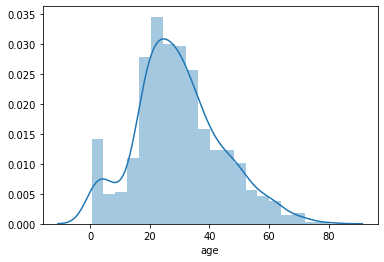

In [5]:
sns.distplot(df['age'].dropna())

<AxesSubplot:xlabel='age'>

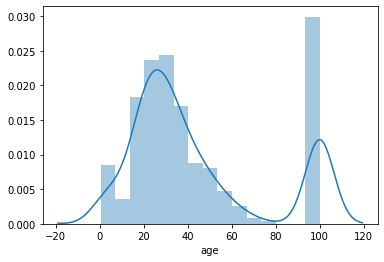

In [6]:
sns.distplot(df['age'].fillna(100))

#### Gaussian Distributed

Text(0, 0.5, 'No of passenger')

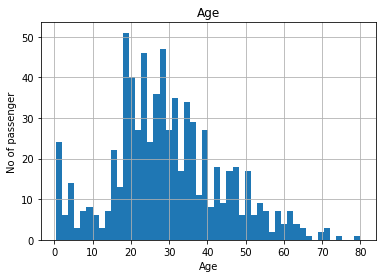

In [7]:
figure=df.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

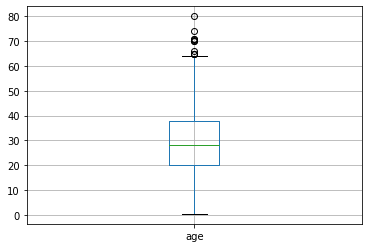

In [8]:
figure=df.boxplot(column="age")

In [9]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

#### If The Data Is Normally Distributed We use this

In [12]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['age'].mean() + 3* df['age'].std()
lower_boundary=df['age'].mean() - 3* df['age'].std()
print(lower_boundary), print(uppper_boundary),print(df['age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

#### If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

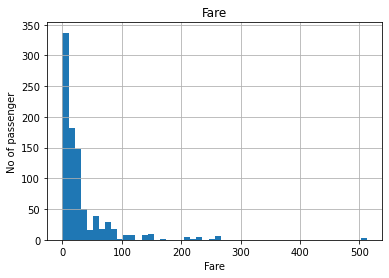

In [20]:
figure=df.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

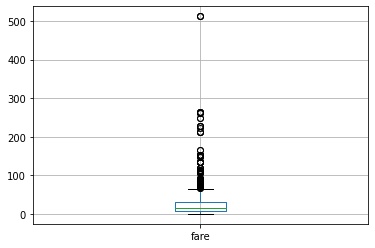

In [21]:
df.boxplot(column="fare")

In [22]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [23]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.fare.quantile(0.75)-df.fare.quantile(0.25)

In [24]:
IQR

23.0896

In [25]:
lower_bridge=df['fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [26]:
#### Extreme outliers
lower_bridge=df['fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [27]:
data=df.copy()

In [29]:
data.loc[data['age']>=73,'age']=73

In [30]:
data.loc[data['fare']>=100,'fare']=100

Text(0, 0.5, 'No of passenger')

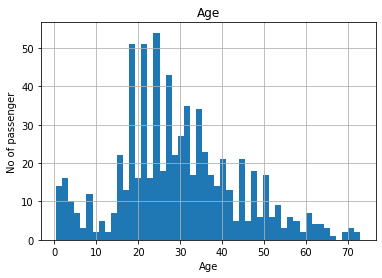

In [33]:
figure=data.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

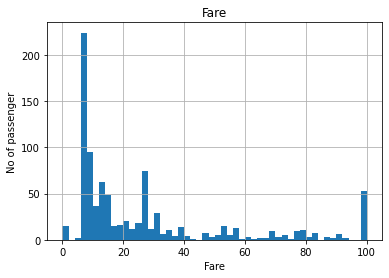

In [32]:
figure=data.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['age','fare']].fillna(0),data['survived'],test_size=0.3)

In [36]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6529850746268657
roc_auc_score: 0.6857422352653461


In [37]:
### Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6940298507462687
roc_auc_score: 0.7149058449498655
